In [1]:
import sys
dirname = '/Users/m.daffarobani/Documents/personal_research/smt'
if dirname not in sys.path:
    sys.path.append(dirname)

from scipy import linalg
from smt.utils.misc import compute_rms_error

from smt.problems import Sphere, NdimRobotArm, Rosenbrock, CantileverBeam, MixedCantileverBeam, \
NdimRosenbrock, TorsionVibration, WaterFlowLFidelity, RobotArm, HierarchicalNeuralNetwork, WingWeight
from smt.sampling_methods import LHS
from smt.surrogate_models import LS, QP, KPLS, KRG, KPLSK, GEKPLS, MGP

#to ignore warning messages
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import scipy.interpolate

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
plot_status = True

import numpy as np

from smt.explainability_tools._partial_dependence import partial_dependence

In [2]:
ndim = 3
ndoe = 100 #int(10*ndim)
# fun = Rosenbrock(ndim=ndim)
# fun = NdimRosenbrock(ndim=ndim)
fun = WingWeight()
sampling = LHS(xlimits=fun.xlimits, criterion='ese', random_state=1)
X = sampling(ndoe)
y = fun(X)

kriging_model = KRG(theta0=[1e-2]*X.shape[1],print_prediction = False)
kriging_model.set_training_values(X, y)

kriging_model.train()

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 100
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  1.0773220


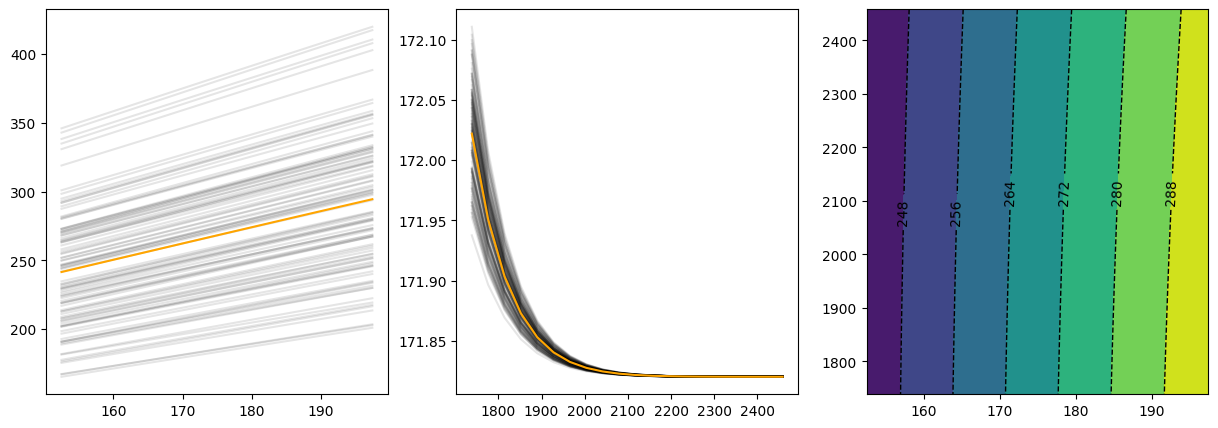

In [11]:
features = [0, 8, (0, 8)]
model = kriging_model
pd_results = partial_dependence(model, X, features, grid_resolution=20, kind='both')

fig, axs = plt.subplots(1, 3, figsize=[15, 5])
for i in range(2):
    for j in range(len(X)):
        axs[i].plot(pd_results[i]['grid_values'][0], pd_results[i]['individual'][j, :], color='black', alpha=0.1)
    axs[i].plot(pd_results[i]['grid_values'][0], pd_results[i]['average'], color='orange')

feature_values = pd_results[2]['grid_values']
XX, YY = np.meshgrid(feature_values[0], feature_values[1])
Z = pd_results[2]['average'].T
CS = axs[2].contour(XX, YY, Z, colors='black', linestyles='dashed', linewidths=1)
axs[2].clabel(CS, inline=1)
CS = axs[2].contourf(XX, YY, Z)
# axs[2].contourf(XX, YY, Z)